# Random Forest Iris Classifier

#### This project was completed as a part of the George Washington University's Data Analysis and Visualization course, revisited and expanded after the course's completion.

#### In this project I built a random forest classifier using scikit-learn and explored the classic Iris dataset. I built the machine learning model and tested its predictions against the actual classifications.

In [42]:
#Dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

### Load the Iris Dataset

In [43]:
iris = load_iris()

print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### Display the iris data in a dataframe

In [44]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

#include the species names we want to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Visualizing the species breakdown

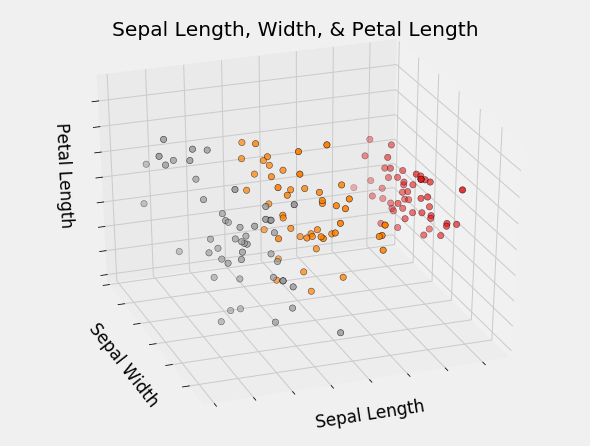

In [45]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

y=iris.target

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Sepal Length, Width, & Petal Length")
ax.set_xlabel("Sepal Length")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length")
ax.w_zaxis.set_ticklabels([])

plt.show()

### Data pre-processing

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Split into training and test data

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=1, stratify=y, test_size=.2)

#Normalize the training and testing data set

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Initiate, fit, and score the random forest classifier

In [48]:
#initiate and fit
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
#Check our accuracy score on the training and testing data
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9666666666666667


### Checking predictions against actual species

In [50]:
predictions = rf.predict(X_test_scaled)

#Display in a DataFrame and convert from target codes into species names
predictions_df = pd.DataFrame({"Prediction": pd.Categorical.from_codes(predictions, iris.target_names),
                               "Actual": pd.Categorical.from_codes(y_test, iris.target_names)}).reset_index(drop=True)

predictions_df.head(10)

,Actual,Prediction
0,virginica,virginica
1,setosa,setosa
2,versicolor,versicolor
3,setosa,setosa
4,setosa,setosa
5,setosa,setosa
6,virginica,virginica
7,virginica,virginica
8,virginica,virginica
9,versicolor,versicolor


### Generate a confusion matrix to see what the model got wrong

In [51]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


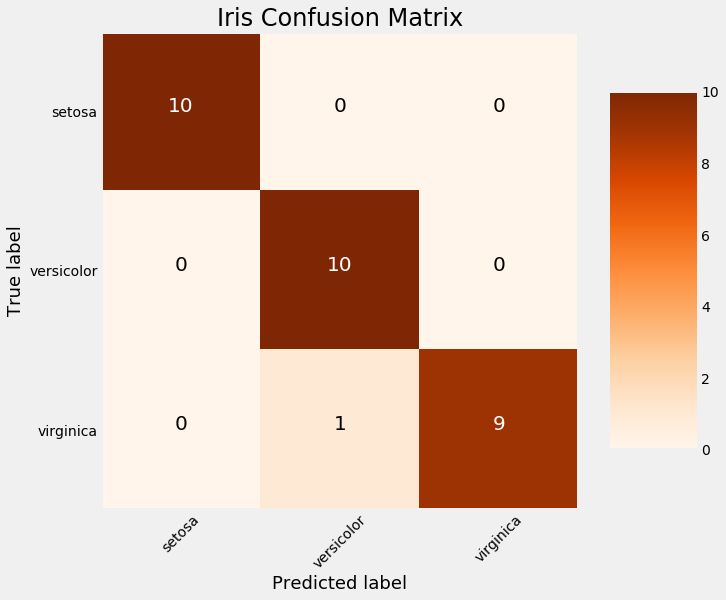

In [52]:
cm = confusion_matrix(predictions_df['Actual'], predictions_df['Prediction'])

plot_confusion_matrix(cm, classes = ['setosa', 'versicolor', 'virginica'],
                      title = 'Iris Confusion Matrix')

### Explore feature importance

In [53]:
importances = rf.feature_importances_

# Sort the features by their importance

sorted(zip(rf.feature_importances_, iris.feature_names), reverse=True)

[(0.438219121181939, 'petal width (cm)'),
 (0.40904581782811006, 'petal length (cm)'),
 (0.12783397037248043, 'sepal length (cm)'),
 (0.024901090617470544, 'sepal width (cm)')]

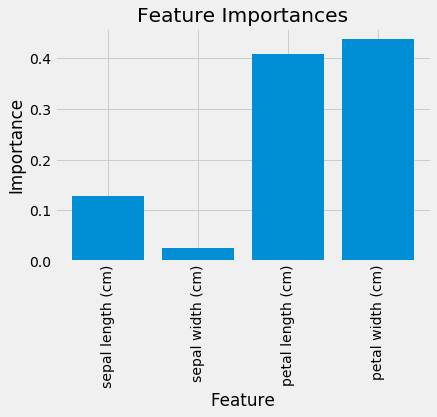

In [54]:
# Visualize the feature importances

x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, iris.feature_names, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importances');